In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
main_df=pd.read_csv("breast-cancer-wisconsin.data", delimiter=",")
main_df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
main_df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',' Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
main_df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df=main_df.copy()

# EDA #

In [5]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
 Uniformity of Cell Shape      0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df.duplicated().sum()

8

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           690 non-null    int64 
 1   Clump Thickness              690 non-null    int64 
 2   Uniformity of Cell Size      690 non-null    int64 
 3    Uniformity of Cell Shape    690 non-null    int64 
 4   Marginal Adhesion            690 non-null    int64 
 5   Single Epithelial Cell Size  690 non-null    int64 
 6   Bare Nuclei                  690 non-null    object
 7   Bland Chromatin              690 non-null    int64 
 8   Normal Nucleoli              690 non-null    int64 
 9   Mitoses                      690 non-null    int64 
 10  Class                        690 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.7+ KB


In [9]:
df['Bare Nuclei'].replace("?", np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           690 non-null    int64 
 1   Clump Thickness              690 non-null    int64 
 2   Uniformity of Cell Size      690 non-null    int64 
 3    Uniformity of Cell Shape    690 non-null    int64 
 4   Marginal Adhesion            690 non-null    int64 
 5   Single Epithelial Cell Size  690 non-null    int64 
 6   Bare Nuclei                  674 non-null    object
 7   Bland Chromatin              690 non-null    int64 
 8   Normal Nucleoli              690 non-null    int64 
 9   Mitoses                      690 non-null    int64 
 10  Class                        690 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.7+ KB


In [11]:
#df["Bare Nuclei"].mean()
df_clean=df[['Bare Nuclei']].dropna()
df_clean=df_clean.astype('int')

In [12]:
df['Bare Nuclei']=df['Bare Nuclei'].fillna(df_clean.mean())

In [13]:
df['Bare Nuclei'].isna().sum()

16

In [14]:
df=df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           674 non-null    int64 
 1   Clump Thickness              674 non-null    int64 
 2   Uniformity of Cell Size      674 non-null    int64 
 3    Uniformity of Cell Shape    674 non-null    int64 
 4   Marginal Adhesion            674 non-null    int64 
 5   Single Epithelial Cell Size  674 non-null    int64 
 6   Bare Nuclei                  674 non-null    object
 7   Bland Chromatin              674 non-null    int64 
 8   Normal Nucleoli              674 non-null    int64 
 9   Mitoses                      674 non-null    int64 
 10  Class                        674 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 63.2+ KB


In [16]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           674 non-null    int64
 1   Clump Thickness              674 non-null    int64
 2   Uniformity of Cell Size      674 non-null    int64
 3    Uniformity of Cell Shape    674 non-null    int64
 4   Marginal Adhesion            674 non-null    int64
 5   Single Epithelial Cell Size  674 non-null    int64
 6   Bare Nuclei                  674 non-null    int32
 7   Bland Chromatin              674 non-null    int64
 8   Normal Nucleoli              674 non-null    int64
 9   Mitoses                      674 non-null    int64
 10  Class                        674 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 60.6 KB


In [18]:
df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.060298,-0.043237,-0.042992,-0.071245,-0.050956,-0.098195,-0.061607,-0.052835,-0.039203,-0.084159
Clump Thickness,-0.060298,1.000000,0.641303,0.653117,0.489771,0.519467,0.594369,0.556485,0.534234,0.351413,0.716232
Uniformity of Cell Size,-0.043237,0.641303,1.000000,0.905683,0.714460,0.748694,0.689669,0.759526,0.723538,0.462032,0.820527
Uniformity of Cell Shape,-0.042992,0.653117,0.905683,1.000000,0.693817,0.717031,0.710654,0.737994,0.723062,0.442850,0.820543
Marginal Adhesion,-0.071245,0.489771,0.714460,0.693817,1.000000,0.603272,0.676214,0.671794,0.601954,0.418226,0.710786
Single Epithelial Cell Size,-0.050956,0.519467,0.748694,0.717031,0.603272,1.000000,0.582520,0.622658,0.633944,0.484079,0.689372
Bare Nuclei,-0.098195,0.594369,0.689669,0.710654,0.676214,0.582520,1.000000,0.679212,0.587690,0.339584,0.820397
Bland Chromatin,-0.061607,0.556485,0.759526,0.737994,0.671794,0.622658,0.679212,1.000000,0.668860,0.345627,0.758376
Normal Nucleoli,-0.052835,0.534234,0.723538,0.723062,0.601954,0.633944,0.587690,0.668860,1.000000,0.432881,0.721841
Mitoses,-0.039203,0.351413,0.462032,0.442850,0.418226,0.484079,0.339584,0.345627,0.432881,1.000000,0.424227


<Axes: >

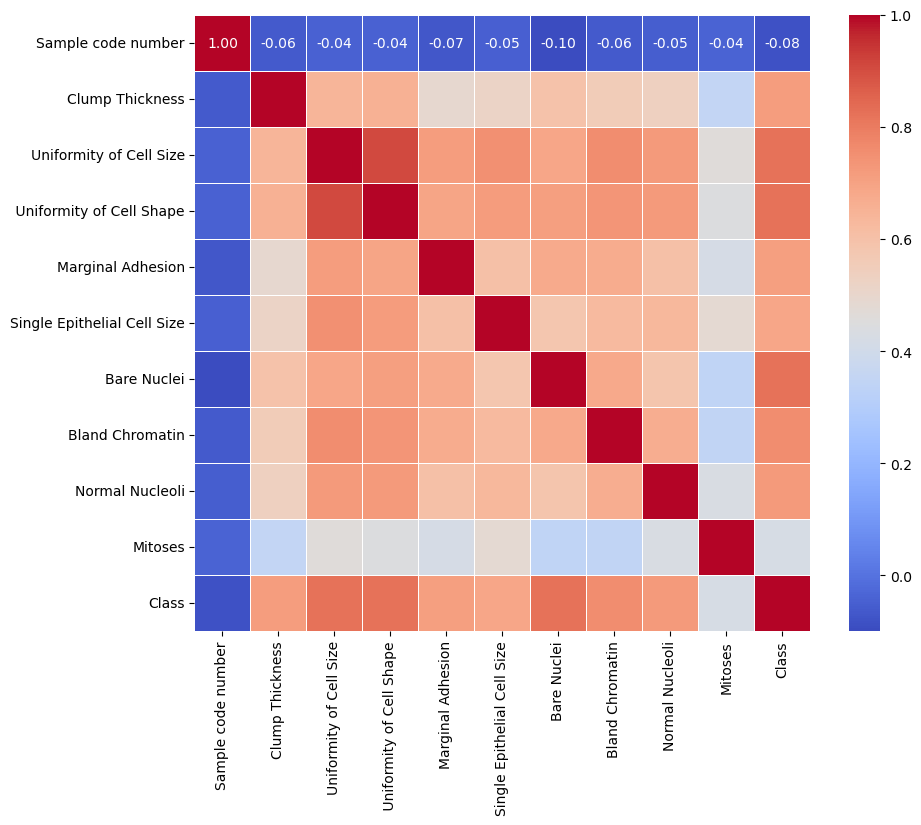

In [19]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

In [20]:
df = df.drop(["Sample code number","Uniformity of Cell Size"], axis = 1) 
df

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,5,7,10,3,2,1,2
1,3,1,1,2,2,3,1,1,2
2,6,8,1,3,4,3,7,1,2
3,4,1,3,2,1,3,1,1,2
4,8,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...
693,3,1,1,3,2,1,1,1,2
694,2,1,1,2,1,1,1,1,2
695,5,10,3,7,3,8,10,2,4
696,4,6,4,3,4,10,6,1,4


<Axes: >

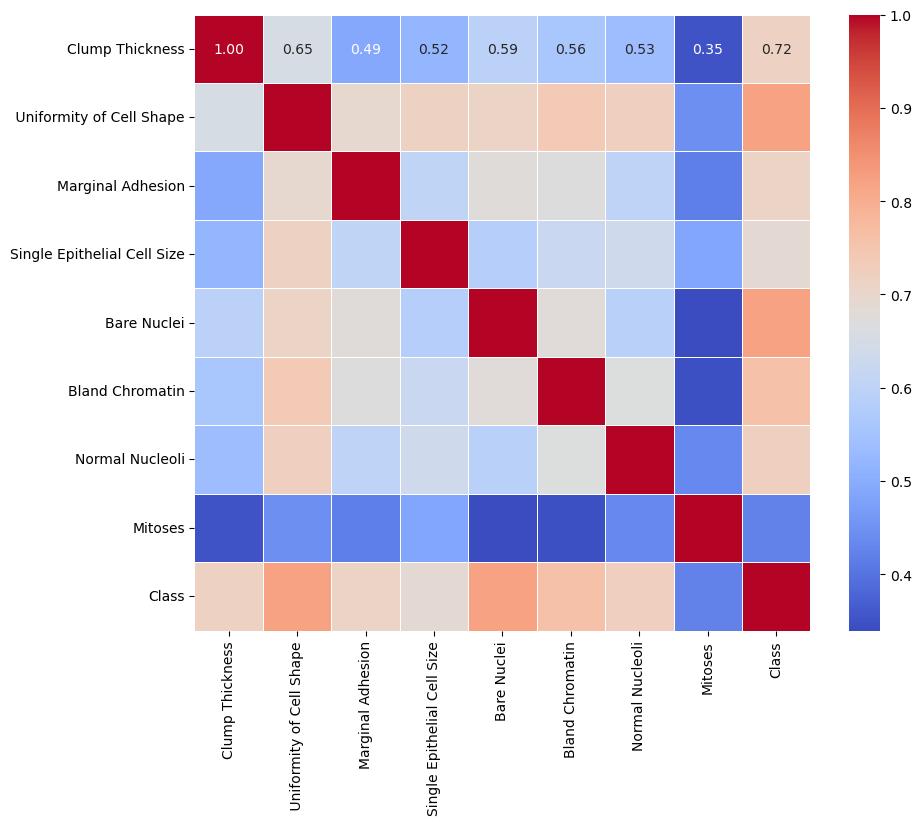

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# SVM Mode #

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm  import SVC

In [23]:
feature = df.drop('Class',axis=1)
label = df['Class'].copy()

In [24]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,train_size=0.8,random_state=44,shuffle=True)

In [25]:
SVM_model = SVC (kernel='poly')

In [26]:
SVM_model.fit(x_train,y_train)

SVC(kernel='poly')

In [27]:
print(classification_report(y_test,SVM_model.predict(x_test)))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       114
           4       0.91      0.93      0.92        55

    accuracy                           0.95       169
   macro avg       0.94      0.94      0.94       169
weighted avg       0.95      0.95      0.95       169

